In [1]:
pip install nltk scikit-learn wordcloud matplotlib pandas

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('punkt')          # For word_tokenize
nltk.download('stopwords')      # For English stop words

[nltk_data] Downloading package punkt to C:\Users\MSI/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\MSI/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
print(nltk.data.path)


['C:\\Users\\MSI/nltk_data', 'c:\\Users\\MSI\\anaconda3\\nltk_data', 'c:\\Users\\MSI\\anaconda3\\share\\nltk_data', 'c:\\Users\\MSI\\anaconda3\\lib\\nltk_data', 'C:\\Users\\MSI\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [4]:
import nltk
nltk.data.path.append("C:/Users/MSI/AppData/Roaming/nltk_data")


In [5]:
# Step 1: Import required libraries and fix NLTK path
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Manually specify a download directory and append it to the path
nltk_data_path = 'C:/Users/MSI/nltk_data'
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.data.path.append(nltk_data_path)

print("NLTK setup complete.")


NLTK setup complete.


[nltk_data] Downloading package punkt to C:/Users/MSI/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:/Users/MSI/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Step 2: Load the CSV data
df = pd.read_csv("Data/exercise1.csv")
print("Data loaded successfully.")
df.head()  # Show first 5 rows


Data loaded successfully.


,id,demo_name,demo_email,demo_academic,base_creativity_conf,base_creativity_freq,base_creativity_def,ai_used_before,ai_tools_list,ai_comfort,...,ai_serenity,ai_joy,ai_hope,ai_friendship,ai_relief,ai_compassion,ai_self_reflection,ai_inspiration,ai_story_moral,created_at
0,23,Aqib Ilyas,NaN,NaN,0,NaN,NaN,False,NaN,0,...,"In that moment of kindness, Mark found a sense...",A genuine smile of joy finally graced Mark's l...,Inspired by the positive change from a single ...,Mark took a step towards building a friendship...,Relief flooded Mark as he received recognition...,"A newfound sense of compassion enveloped Mark,...","In silent contemplation, Mark delved into self...","Mark's story became an inspiration, showcasing...",Kindness and compassion can brighten the darke...,2025-04-17 11:37:30.900962
1,9,Lisa Flynn,NaN,NaN,0,NaN,NaN,False,NaN,0,...,Thomas found a moment of serenity and peace in...,A genuine smile of joy lit up Thomas's face as...,"Inspired by the positive turn of events, Thoma...",Thomas forged a newfound sense of friendship w...,Relief washed over Thomas as his boss acknowle...,Thomas felt a deep sense of compassion towards...,"Through silent contemplation, Thomas underwent...",Thomas's story inspired a community to believe...,Kindness and empathy can bring light even on t...,2025-04-17 11:35:34.454249
2,22,Daris Dzakwan Hoesien,NaN,NaN,0,NaN,NaN,False,NaN,0,...,"In that moment, John found peace in the simple...",Receiving a heartfelt note and a gift from the...,"Inspired by the experience, John found hope in...",John's apology to his coworker led to a newfou...,Relief flooded John as his boss acknowledged h...,"John felt a newfound sense of compassion, real...","Through silent contemplation, John understood ...","John's story spread as a beacon of hope, inspi...",Kindness and compassion can turn a day of misf...,2025-04-17 11:37:00.320471
3,8,Lubana Akter,NaN,NaN,0,NaN,NaN,False,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-17 11:35:24.637522
4,15,Eetu Holmi,NaN,NaN,0,NaN,NaN,False,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-17 11:36:18.012134


In [7]:
# Step 3: Define emotion columns and create full text columns
human_emotions = [
    'frustration','sadness','fear','anger','empathy','gratitude','protectiveness',
    'serenity','joy','hope','friendship','relief','compassion','self_reflection','inspiration'
]
ai_emotions = [
    'ai_frustration','ai_sadness','ai_fear','ai_anger','ai_empathy','ai_gratitude',
    'ai_protectiveness','ai_serenity','ai_joy','ai_hope','ai_friendship','ai_relief',
    'ai_compassion','ai_self_reflection','ai_inspiration'
]

df['human_emotion_text'] = df[human_emotions].fillna('').agg(' '.join, axis=1)
df['ai_emotion_text'] = df[ai_emotions].fillna('').agg(' '.join, axis=1)

print("Emotion texts combined.")
df[['human_emotion_text', 'ai_emotion_text']].head()


Emotion texts combined.


,human_emotion_text,ai_emotion_text
0,Frustration emerges as Minhal faces one setbac...,"Mark's frustration continued to mount, pushing..."
1,"Chad's frustration grew with each mishap, maki...",He felt a deep sense of frustration as obstacl...
2,"The frustration comes to mind, but he continue...",John's frustration grew as obstacles piled up ...
3,Poco feels like bad luck has struck him this m...,
4,Paul muttered a quiet curse while fighting his...,


In [8]:
# Step 4: Preprocess text by tokenizing, removing stopwords and punctuation
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])

df['human_clean'] = df['human_emotion_text'].apply(preprocess)
df['ai_clean'] = df['ai_emotion_text'].apply(preprocess)

print("Text preprocessing complete.")
df[['human_clean', 'ai_clean']].head()


Text preprocessing complete.


,human_clean,ai_clean
0,frustration emerges minhal faces one setback a...,mark frustration continued mount pushing brink...
1,chad frustration grew mishap making feel incre...,felt deep sense frustration obstacles kept pil...
2,frustration comes mind continues tackle sadnes...,john frustration grew obstacles piled already ...
3,poco feels like bad luck struck morning real b...,
4,paul muttered quiet curse fighting desire scre...,


In [9]:
# Step 5: Measure lexical diversity
def lexical_diversity(texts):
    all_words = ' '.join(texts).split()
    return len(set(all_words)) / len(all_words)

human_div = lexical_diversity(df['human_clean'])
ai_div = lexical_diversity(df['ai_clean'])

print(f"Lexical Diversity - Human: {human_div:.3f}")
print(f"Lexical Diversity - AI: {ai_div:.3f}")


Lexical Diversity - Human: 0.307
Lexical Diversity - AI: 0.158


In [10]:
# Step 6: TF-IDF vector richness (semantic density proxy)
vectorizer = TfidfVectorizer()
human_tfidf = vectorizer.fit_transform(df['human_clean'])
ai_tfidf = vectorizer.fit_transform(df['ai_clean'])

print(f"Avg Non-Zero TF-IDF Terms per Human Response: {human_tfidf.getnnz(axis=1).mean():.2f}")
print(f"Avg Non-Zero TF-IDF Terms per AI Response: {ai_tfidf.getnnz(axis=1).mean():.2f}")


Avg Non-Zero TF-IDF Terms per Human Response: 128.61
Avg Non-Zero TF-IDF Terms per AI Response: 91.91


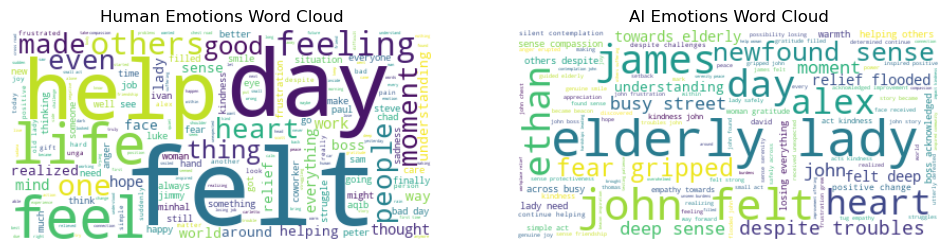

In [11]:
# Step 7: Generate and display word clouds
wordcloud_human = WordCloud(background_color='white').generate(' '.join(df['human_clean']))
wordcloud_ai = WordCloud(background_color='white').generate(' '.join(df['ai_clean']))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_human, interpolation='bilinear')
plt.title("Human Emotions Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ai, interpolation='bilinear')
plt.title("AI Emotions Word Cloud")
plt.axis('off')

plt.show()


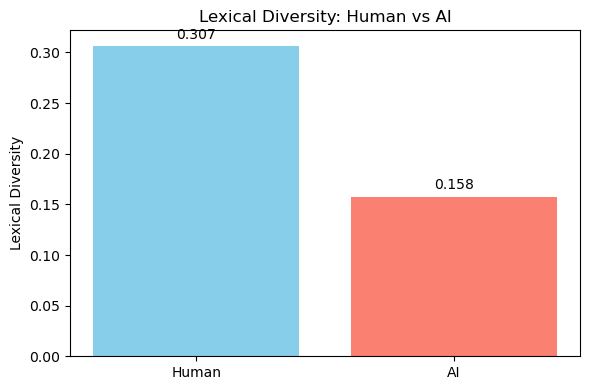

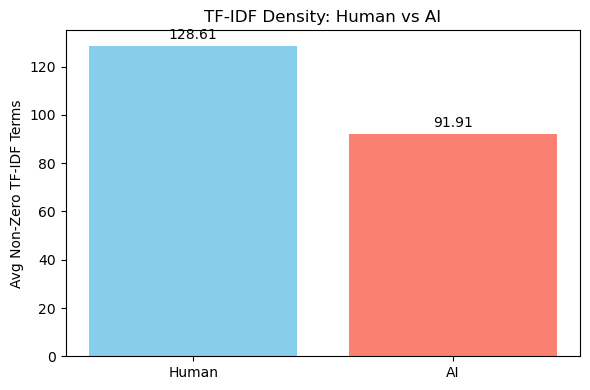

In [13]:
import numpy as np

# --- Lexical Diversity Plot ---
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(['Human', 'AI'], [human_div, ai_div], color=['skyblue', 'salmon'])

# Annotate values
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Lexical Diversity')
ax.set_title('Lexical Diversity: Human vs AI')
plt.tight_layout()
plt.show()


# --- TF-IDF Density Plot ---
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(['Human', 'AI'], 
              [human_tfidf.getnnz(axis=1).mean(), ai_tfidf.getnnz(axis=1).mean()], 
              color=['skyblue', 'salmon'])

# Annotate values
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Avg Non-Zero TF-IDF Terms')
ax.set_title('TF-IDF Density: Human vs AI')
plt.tight_layout()
plt.show()
